# Read Data

In [3]:
import pandas as pd
import sklearn
import numpy as n
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet("data.parquet")

In [5]:
df.head()

row_id        order_id       ship_mode customer_id    customer_name  \
0       1  CA-2016-152156    Second Class    CG-12520      Claire Gute   
1       2  CA-2016-152156    Second Class    CG-12520      Claire Gute   
2       3  CA-2016-138688    Second Class    DV-13045  Darrin Van Huff   
3       4  US-2015-108966  Standard Class    SO-20335   Sean O'Donnell   
4       5  US-2015-108966  Standard Class    SO-20335   Sean O'Donnell   

     segment        country             city       state  postal_code  ...  \
0   Consumer  United States        Henderson    Kentucky        42420  ...   
1   Consumer  United States        Henderson    Kentucky        42420  ...   
2  Corporate  United States      Los Angeles  California        90036  ...   
3   Consumer  United States  Fort Lauderdale     Florida        33311  ...   
4   Consumer  United States  Fort Lauderdale     Florida        33311  ...   

  ship_year ship_month ship_day order_date order_weekday_index  order_weekday  \
0      2016         11       11 2016-11-08                   1        Tuesday   
1      2016         11       11 2016-11-08                   1        Tuesday   
2      2016          6       16 2016-06-12                   6         Sunday   
3      2015         10       18 2015-10-11                   6         Sunday   
4      2015         10       18 2015-10-11                   6         Sunday   

   order_week_of_year  order_is_weekend  ship_date  delivery_time  
0                  45             False 2016-11-11            3.0  
1                  45             False 2016-11-11            3.0  
2                  23              True 2016-06-16            4.0  
3                  41              True 2015-10-18            7.0  
4                  41              True 2015-10-18            7.0  

[5 rows x 32 columns]

In [ ]:
df["original_price_per_unit"] = df["sales"] / (df["quantity"] * (1 - df["discount"]))
df['markdown_amount'] = (df['original_price_per_unit'] * df['quantity']) - df['sales']

In [13]:
print(df["product_name"].unique)

<bound method Series.unique of 0                       Bush Somerset Collection Bookcase
1       Hon Deluxe Fabric Upholstered Stacking Chairs,...
2       Self-Adhesive Address Labels for Typewriters b...
3           Bretford CR4500 Series Slim Rectangular Table
4                          Eldon Fold 'N Roll Cart System
                              ...                        
9989                               Ultra Door Pull Handle
9990    Tenex B1-RE Series Chair Mats for Low Pile Car...
9991                                Aastra 57i VoIP phone
9992    It's Hot Message Books with Stickers, 2 3/4" x 5"
9993    Acco 7-Outlet Masterpiece Power Center, Wihtou...
Name: product_name, Length: 9994, dtype: object>


In [20]:
df_print = df[df["product_name"]=="Bretford CR4500 Series Slim Rectangular Table"]
display(df_print.head(20).T)

3     \
row_id                                                               4   
order_id                                                US-2015-108966   
ship_mode                                               Standard Class   
customer_id                                                   SO-20335   
customer_name                                           Sean O'Donnell   
segment                                                       Consumer   
country                                                  United States   
city                                                   Fort Lauderdale   
state                                                          Florida   
postal_code                                                      33311   
region                                                           South   
product_id                                             FUR-TA-10000577   
category                                                     Furniture   
sub_category                                                    Tables   
product_name             Bretford CR4500 Series Slim Rectangular Table   
sales                                                         957.5775   
quantity                                                             5   
discount                                                          0.45   
profit                                                        -383.031   
order_year                                                        2015   
order_month                                                         10   
order_day                                                           11   
ship_year                                                         2015   
ship_month                                                          10   
ship_day                                                            18   
order_date                                         2015-10-11 00:00:00   
order_weekday_index                                                  6   
order_weekday                                                   Sunday   
order_week_of_year                                                  41   
order_is_weekend                                                  True   
ship_date                                          2015-10-18 00:00:00   
delivery_time                                                      7.0   
original_price                                                  348.21   
original_price_per_unit                                         348.21   
markdown_amount                                               783.4725   
category_diversity                                                   2   

                                                                  24    \
row_id                                                              25   
order_id                                                CA-2015-106320   
ship_mode                                               Standard Class   
customer_id                                                   EB-13870   
customer_name                                              Emily Burns   
segment                                                       Consumer   
country                                                  United States   
city                                                              Orem   
state                                                             Utah   
postal_code                                                      84057   
region                                                            West   
product_id                                             FUR-TA-10000577   
category                                                     Furniture   
sub_category                                                    Tables   
product_name             Bretford CR4500 Series Slim Rectangular Table   
sales                                                          1044.63   
quantity                                                             

In [6]:
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["delivery_time"]
    .mean()
    .reset_index()
)
pivot = df_mean.pivot(
    index="order_year",
    columns="ship_mode",
    values="delivery_time"
)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# gewünschte Reihenfolge der Ship Modes
# -------------------------------------------------
order = [
    "Same Day",
    "First Class",
    "Second Class",
    "Standard Class"
]

# -------------------------------------------------
# 1) Häufigkeit der ship_mode NACH JAHR ausgeben
# -------------------------------------------------
print("Anzahl pro Jahr und Ship Mode:\n")

count_table = (
    df
    .groupby(["order_year", "ship_mode"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=order)
)

print(count_table)
print("\n" + "-"*40 + "\n")

# -------------------------------------------------
# 2) Mittelwert pro Jahr & ship_mode
# -------------------------------------------------
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["delivery_time"]
    .mean()
    .reset_index()
)

# -------------------------------------------------
# 3) Pivot + Reihenfolge
# -------------------------------------------------
pivot = (
    df_mean
    .pivot(index="order_year", columns="ship_mode", values="delivery_time")
    .reindex(columns=order)
)

# -------------------------------------------------
# 4) KORREKTER AVG:
#    über ALLE Bestellungen eines Jahres
# -------------------------------------------------
year_avg = (
    df
    .groupby("order_year")["time_to_deliver"]
    .mean()
)

pivot["AVG"] = year_avg

# -------------------------------------------------
# 5) Plot
# -------------------------------------------------
ax = pivot.plot(
    kind="bar",
    figsize=(14, 6)
)

ax.set_xlabel("Order Year")
ax.set_ylabel("Ø Time to Deliver")
ax.set_title("Average Time to Deliver by Order Year and Ship Mode")
ax.legend(title="Ship Mode")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# -------------------------------------------------
# 6) Werte über Balken schreiben
# -------------------------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f",
        padding=3
    )

plt.tight_layout()
plt.show()


Anzahl pro Jahr und Ship Mode:

ship_mode   Same Day  First Class  Second Class  Standard Class
order_year                                                     
2014              90          291           381            1231
2015             109          288           417            1288
2016             158          387           490            1552
2017             186          572           657            1897

----------------------------------------



KeyError: 'Column not found: time_to_deliver'

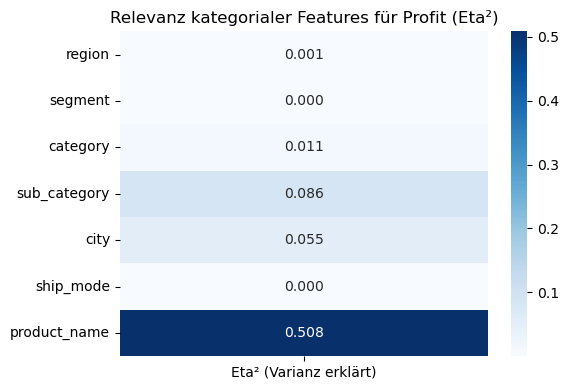

{'region': 0.0007869112604017099, 'segment': 0.00017974285080725935, 'category': 0.010755060495526988, 'sub_category': 0.08619888045219694, 'city': 0.05505624571830937, 'ship_mode': 4.621893253853331e-05, 'product_name': 0.508424052648159}


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Funktion zur Berechnung von Eta-Quadrat
def eta_squared(df, categorical_col, target_col):
    groups = [
        df[target_col].values
        for name, group in df.groupby(categorical_col)
    ]
    f_stat, p_val = stats.f_oneway(*groups)

    grand_mean = df[target_col].mean()
    ss_between = sum(
        len(group) * (group.mean() - grand_mean) ** 2
        for name, group in df.groupby(categorical_col)
        for group in [group[target_col]]
    )
    ss_total = sum((df[target_col] - grand_mean) ** 2)

    return ss_between / ss_total


# Features testen
categorical_features = [
    "region",
    "segment",
    "category",
    "sub_category",
    "city",
    "ship_mode",
    "product_name"
]

eta_results = {
    feature: eta_squared(df, feature, "profit")
    for feature in categorical_features
}

# DataFrame für Heatmap
eta_df = pd.DataFrame.from_dict(
    eta_results,
    orient="index",
    columns=["Eta² (Varianz erklärt)"]
)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(
    eta_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    cbar=True
)
plt.title("Relevanz kategorialer Features für Profit (Eta²)")
plt.tight_layout()
plt.show()

print(eta_results)

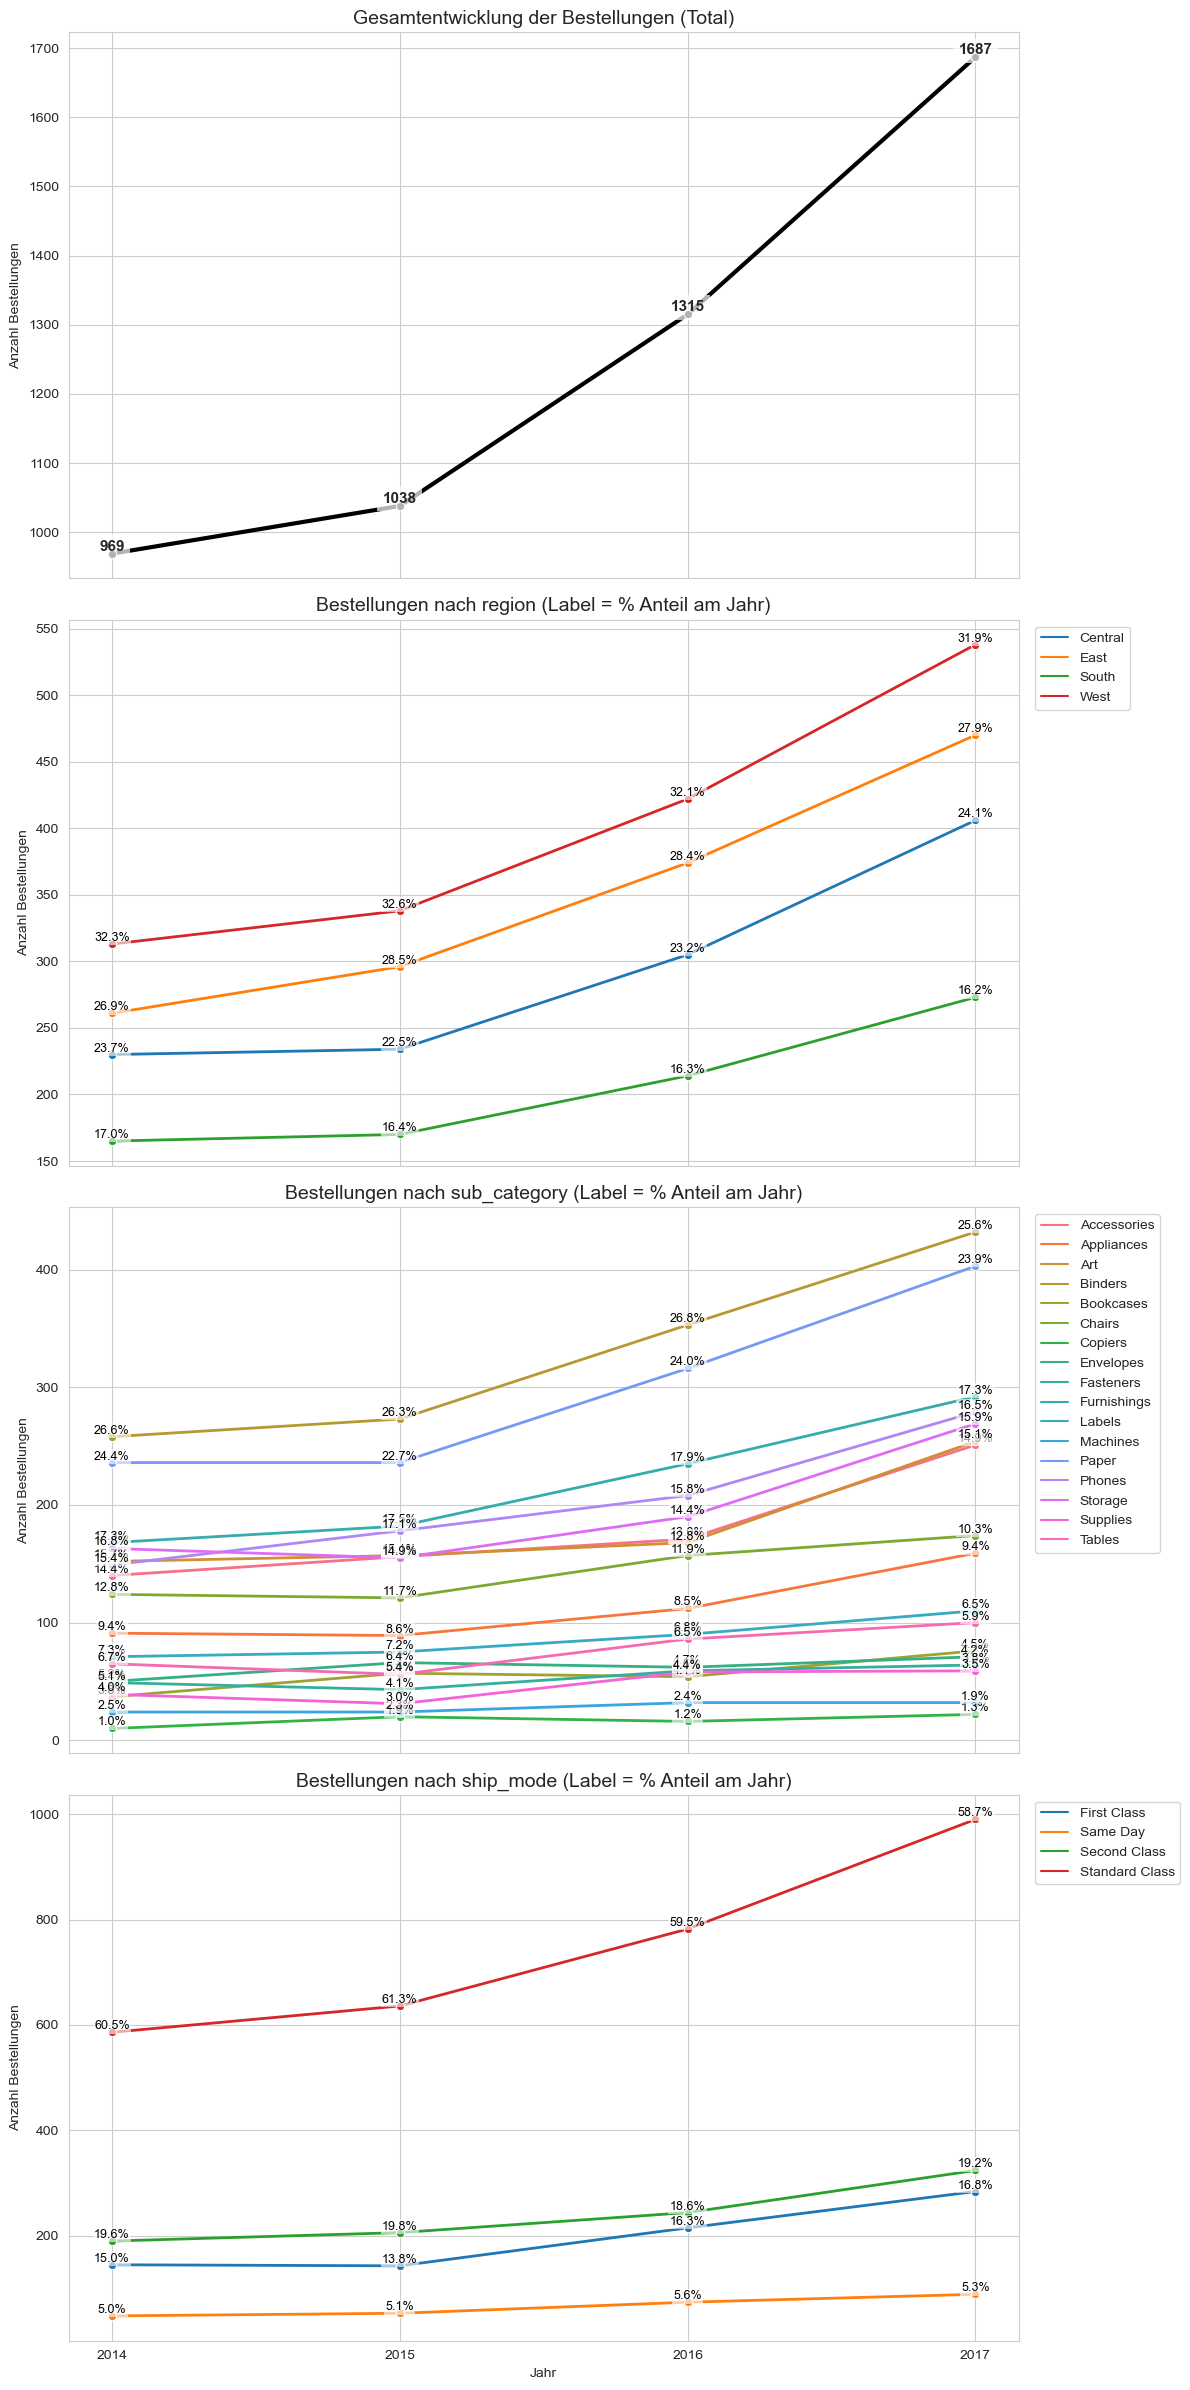

In [13]:
# ---------------------------------------------------------
# TEIL 2: Vorberechnungen
# ---------------------------------------------------------
# Berechne die Gesamtanzahl Unique Orders pro Jahr (für den Nenner der Prozentrechnung)
yearly_totals = df.groupby('order_year')['order_id'].nunique()


# ---------------------------------------------------------
# TEIL 3: Plotting
# ---------------------------------------------------------
sns.set_style("whitegrid")

# Erstelle 4 untereinanderliegende Diagramme
fig, axes = plt.subplots(4, 1, figsize=(12, 24), sharex=True)
dimensions = ['Gesamt', 'region', 'sub_category', 'ship_mode']

for i, dim in enumerate(dimensions):
    ax = axes[i]
    
    if dim == 'Gesamt':
        # --- 1. Gesamtanzahl ---
        grouped = df.groupby('order_year')['order_id'].nunique().reset_index()
        
        sns.lineplot(data=grouped, x='order_year', y='order_id', 
                     marker='o', color='black', linewidth=3, ax=ax)
        
        ax.set_title("Gesamtentwicklung der Bestellungen (Total)", fontsize=14)
        ax.set_ylabel("Anzahl Bestellungen")
        
        # Beschriftung: Absolute Zahlen
        for _, row in grouped.iterrows():
            ax.text(row['order_year'], row['order_id'], 
                    f"{int(row['order_id'])}", 
                    ha='center', va='bottom', fontweight='bold', fontsize=11, 
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            
    else:
        # --- 2., 3., 4. Kategorien ---
        # Gruppieren nach Jahr und Kategorie
        grouped = df.groupby(['order_year', dim])['order_id'].nunique().reset_index()
        
        # Mit Jahressummen mergen, um % zu berechnen
        grouped = grouped.merge(yearly_totals.rename('total_year'), on='order_year')
        grouped['percentage'] = (grouped['order_id'] / grouped['total_year']) * 100
        
        # Plotten (Y-Achse bleibt absolute Anzahl, damit man das Wachstum sieht)
        sns.lineplot(data=grouped, x='order_year', y='order_id', hue=dim, 
                     marker='o', linewidth=2, ax=ax)
        
        ax.set_title(f"Bestellungen nach {dim} (Label = % Anteil am Jahr)", fontsize=14)
        ax.set_ylabel("Anzahl Bestellungen")
        
        # Beschriftung: Prozentwerte an die Punkte schreiben
        for _, row in grouped.iterrows():
            # Nur beschriften, wenn Daten vorhanden (NaN safety)
            if pd.notnull(row['percentage']):
                ax.text(row['order_year'], row['order_id'], 
                        f"{row['percentage']:.1f}%", 
                        ha='center', va='bottom', fontsize=9, color='black',
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))
        
        # Legende nach außen schieben
        ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

# X-Achse nur ganze Jahre anzeigen
plt.xticks(sorted(df['order_year'].unique()))
plt.xlabel("Jahr")

plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def draw_styled_plot(
        ax, 
        x_data, 
        y_data, 
        label, 
        title="", 
        ylabel="", 
        linestyle='-', 
        color=None, 
        is_percent=False):
    
    # 1. Plotten der Daten
    # Wir nutzen hier ax.plot (Matplotlib Standard), da wir keine Aggregation mehr brauchen
    ax.plot(x_data, y_data, 
            marker='o', 
            linewidth=2.5, 
            linestyle=linestyle, 
            label=label,
            color=color)
    
    # 2. Styling und Beschriftungen setzen
    if title:
        ax.set_title(title, fontweight='bold')
    
    if ylabel:
        ax.set_ylabel(ylabel)
        
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Legende anzeigen, falls ein Label übergeben wurde
    if label:
        # Legende platziert sich automatisch, kann hier aber fixiert werden
        ax.legend(loc='upper left', fontsize='small')

    # 3. Optional: Prozent-Formatierung (wie in deinem vorherigen Code)
    if is_percent:
        # Y-Achse formatieren
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        # Text-Labels an die Punkte schreiben
        for x, y in zip(x_data, y_data):
            # Prüfen ob y ein gültiger Wert ist (nicht None/NaN)
            if y is not None:
                ax.text(x, y, 
                        f"{y:.1f}%", 
                        fontsize=9, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.5))

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

# ---------------------------------------------------------
# DEINE FUNKTION (unverändert)
# ---------------------------------------------------------
def draw_styled_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    ax.plot(x_data, y_data, marker='o', linewidth=2.5, linestyle=linestyle, 
            label=label, color=color)
    
    if title: ax.set_title(title, fontweight='bold')
    if ylabel: ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if label:
        ax.legend(loc='upper left', fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        for x, y in zip(x_data, y_data):
            if pd.notnull(y):
                ax.text(x, y, f"{y:.1f}%", fontsize=9, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.5))

# ---------------------------------------------------------
# VORBEREITUNG DER DATEN
# ---------------------------------------------------------

# 1. Datumskram
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)
years = sorted(df['order_year'].unique())
months = sorted(df['order_month'].unique())

# 2. Allgemeine Stats (Zeilen vs. Orders)
stats_monthly = df.groupby('order_month').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()
stats_yearly = df.groupby('order_year').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()

# 3. Daten für Kategorien vorbereiten (Jahresbasis für Übersichtlichkeit)
yearly_totals = df.groupby('order_year')['order_id'].nunique()

# Hilfsfunktion, um Daten fix und fertig für eine Kategorie zu holen
def get_cat_data(category_col):
    grp = df.groupby(['order_year', category_col])['order_id'].nunique().reset_index()
    grp = grp.merge(yearly_totals.rename('total'), on='order_year')
    grp['pct'] = (grp['order_id'] / grp['total']) * 100
    return grp

# Wir berechnen die Tabellen jetzt schon:
df_region = get_cat_data('region')
df_ship   = get_cat_data('ship_mode')
# (Sub-Category lassen wir der Übersicht halber hier kurz, Prinzip ist identisch)

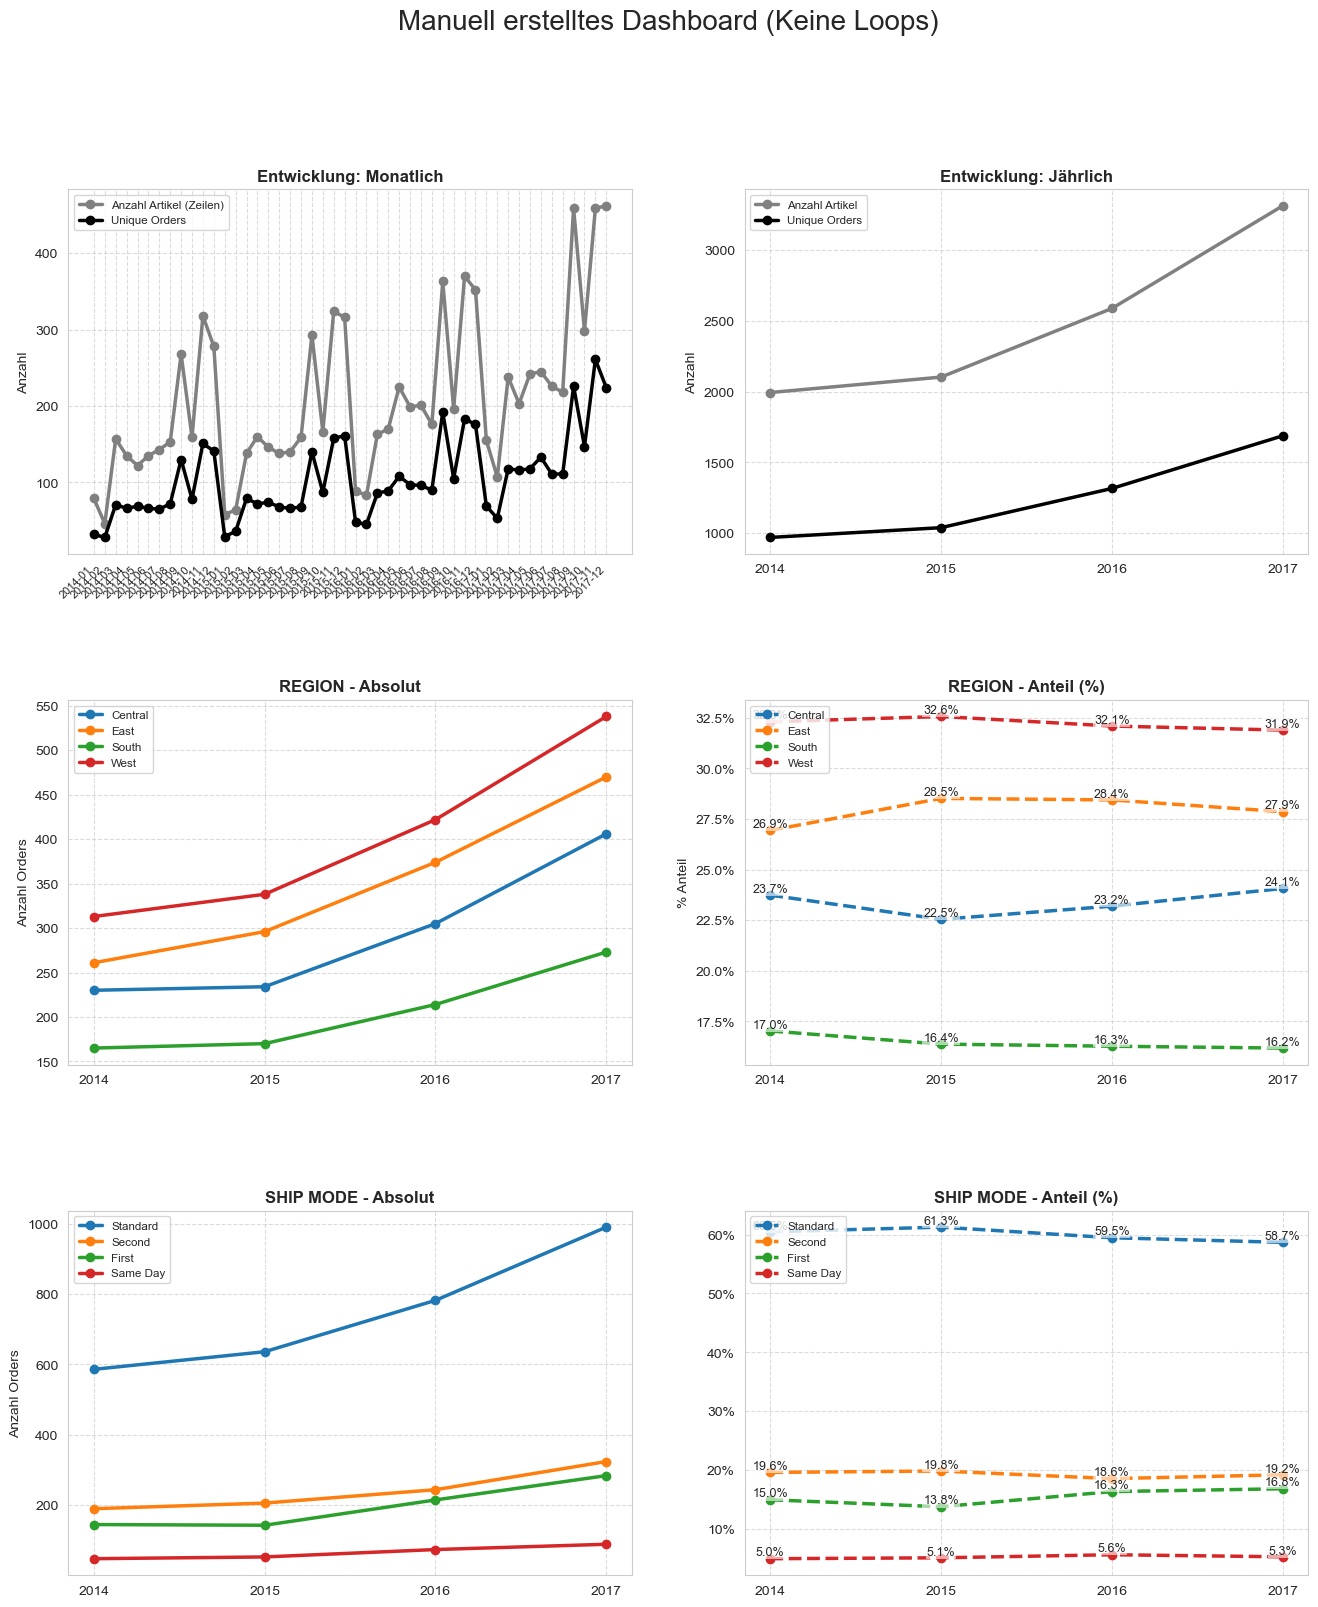

In [41]:
# Farben definieren (Manuell, da keine Schleife)
c_blue = '#1f77b4'
c_orange = '#ff7f0e'
c_green = '#2ca02c'
c_red = '#d62728'
c_purple = '#9467bd'
c_grey = 'grey'
c_black = 'black'

# Canvas erstellen: 3 Zeilen (Allgemein, Region, Ship Mode), 2 Spalten
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4) # Platz zwischen Zeilen

# ---------------------------------------------------------
# ZEILE 1: ALLGEMEINE ENTWICKLUNG
# ---------------------------------------------------------

# --- LINKS: MONATLICH (axes[0,0]) ---
ax_gen_month = axes[0, 0]

# Linie 1: Artikel
draw_styled_plot(
    ax=ax_gen_month,
    x_data=stats_monthly['order_month'],
    y_data=stats_monthly['rows'],
    label='Anzahl Artikel (Zeilen)',
    title='Entwicklung: Monatlich',
    ylabel='Anzahl',
    color=c_grey,
    linestyle='-'
)

# Linie 2: Orders (in denselben Plot)
draw_styled_plot(
    ax=ax_gen_month,
    x_data=stats_monthly['order_month'],
    y_data=stats_monthly['orders'],
    label='Unique Orders',
    color=c_black,
    linestyle='-'
)
# Manuelle Ticks für Monate
ax_gen_month.set_xticks(range(len(months)))
ax_gen_month.set_xticklabels(months, rotation=45, ha='right', fontsize=8)


# --- RECHTS: JÄHRLICH (axes[0,1]) ---
ax_gen_year = axes[0, 1]

# Linie 1: Artikel
draw_styled_plot(
    ax=ax_gen_year,
    x_data=stats_yearly['order_year'],
    y_data=stats_yearly['rows'],
    label='Anzahl Artikel',
    title='Entwicklung: Jährlich',
    ylabel='Anzahl',
    color=c_grey
)

# Linie 2: Orders
draw_styled_plot(
    ax=ax_gen_year,
    x_data=stats_yearly['order_year'],
    y_data=stats_yearly['orders'],
    label='Unique Orders',
    color=c_black
)
ax_gen_year.set_xticks(years)


# ---------------------------------------------------------
# ZEILE 2: REGION (Absolut Links, Relativ Rechts)
# ---------------------------------------------------------
ax_reg_abs = axes[1, 0]
ax_reg_rel = axes[1, 1]

# Wir filtern die Daten manuell für jede Region:
central = df_region[df_region['region'] == 'Central']
east    = df_region[df_region['region'] == 'East']
south   = df_region[df_region['region'] == 'South']
west    = df_region[df_region['region'] == 'West']

# --- LINKS: Absolute Zahlen ---
draw_styled_plot(ax=ax_reg_abs, x_data=central['order_year'], y_data=central['order_id'], label='Central', color=c_blue, title='REGION - Absolut', ylabel='Anzahl Orders')
draw_styled_plot(ax=ax_reg_abs, x_data=east['order_year'],    y_data=east['order_id'],    label='East',    color=c_orange)
draw_styled_plot(ax=ax_reg_abs, x_data=south['order_year'],   y_data=south['order_id'],   label='South',   color=c_green)
draw_styled_plot(ax=ax_reg_abs, x_data=west['order_year'],    y_data=west['order_id'],    label='West',    color=c_red)
ax_reg_abs.set_xticks(years)

# --- RECHTS: Relative Anteile (%) ---
draw_styled_plot(ax=ax_reg_rel, x_data=central['order_year'], y_data=central['pct'], label='Central', color=c_blue, title='REGION - Anteil (%)', ylabel='% Anteil', linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_reg_rel, x_data=east['order_year'],    y_data=east['pct'],    label='East',    color=c_orange, linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_reg_rel, x_data=south['order_year'],   y_data=south['pct'],   label='South',   color=c_green,  linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_reg_rel, x_data=west['order_year'],    y_data=west['pct'],    label='West',    color=c_red,    linestyle='--', is_percent=True)
ax_reg_rel.set_xticks(years)


# ---------------------------------------------------------
# ZEILE 3: SHIP MODE
# ---------------------------------------------------------
ax_ship_abs = axes[2, 0]
ax_ship_rel = axes[2, 1]

# Daten manuell filtern
std_class = df_ship[df_ship['ship_mode'] == 'Standard Class']
sec_class = df_ship[df_ship['ship_mode'] == 'Second Class']
fst_class = df_ship[df_ship['ship_mode'] == 'First Class']
same_day  = df_ship[df_ship['ship_mode'] == 'Same Day']

# --- LINKS: Absolut ---
draw_styled_plot(ax=ax_ship_abs, x_data=std_class['order_year'], y_data=std_class['order_id'], label='Standard', color=c_blue, title='SHIP MODE - Absolut', ylabel='Anzahl Orders')
draw_styled_plot(ax=ax_ship_abs, x_data=sec_class['order_year'], y_data=sec_class['order_id'], label='Second',   color=c_orange)
draw_styled_plot(ax=ax_ship_abs, x_data=fst_class['order_year'], y_data=fst_class['order_id'], label='First',    color=c_green)
draw_styled_plot(ax=ax_ship_abs, x_data=same_day['order_year'],  y_data=same_day['order_id'],  label='Same Day', color=c_red)
ax_ship_abs.set_xticks(years)

# --- RECHTS: Relativ (%) ---
draw_styled_plot(ax=ax_ship_rel, x_data=std_class['order_year'], y_data=std_class['pct'], label='Standard', color=c_blue, title='SHIP MODE - Anteil (%)', linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_ship_rel, x_data=sec_class['order_year'], y_data=sec_class['pct'], label='Second',   color=c_orange, linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_ship_rel, x_data=fst_class['order_year'], y_data=fst_class['pct'], label='First',    color=c_green,  linestyle='--', is_percent=True)
draw_styled_plot(ax=ax_ship_rel, x_data=same_day['order_year'],  y_data=same_day['pct'],  label='Same Day', color=c_red,    linestyle='--', is_percent=True)
ax_ship_rel.set_xticks(years)


# Finales Layout
fig.suptitle('Manuell erstelltes Dashboard (Keine Loops)', fontsize=20, y=0.98)
plt.show()

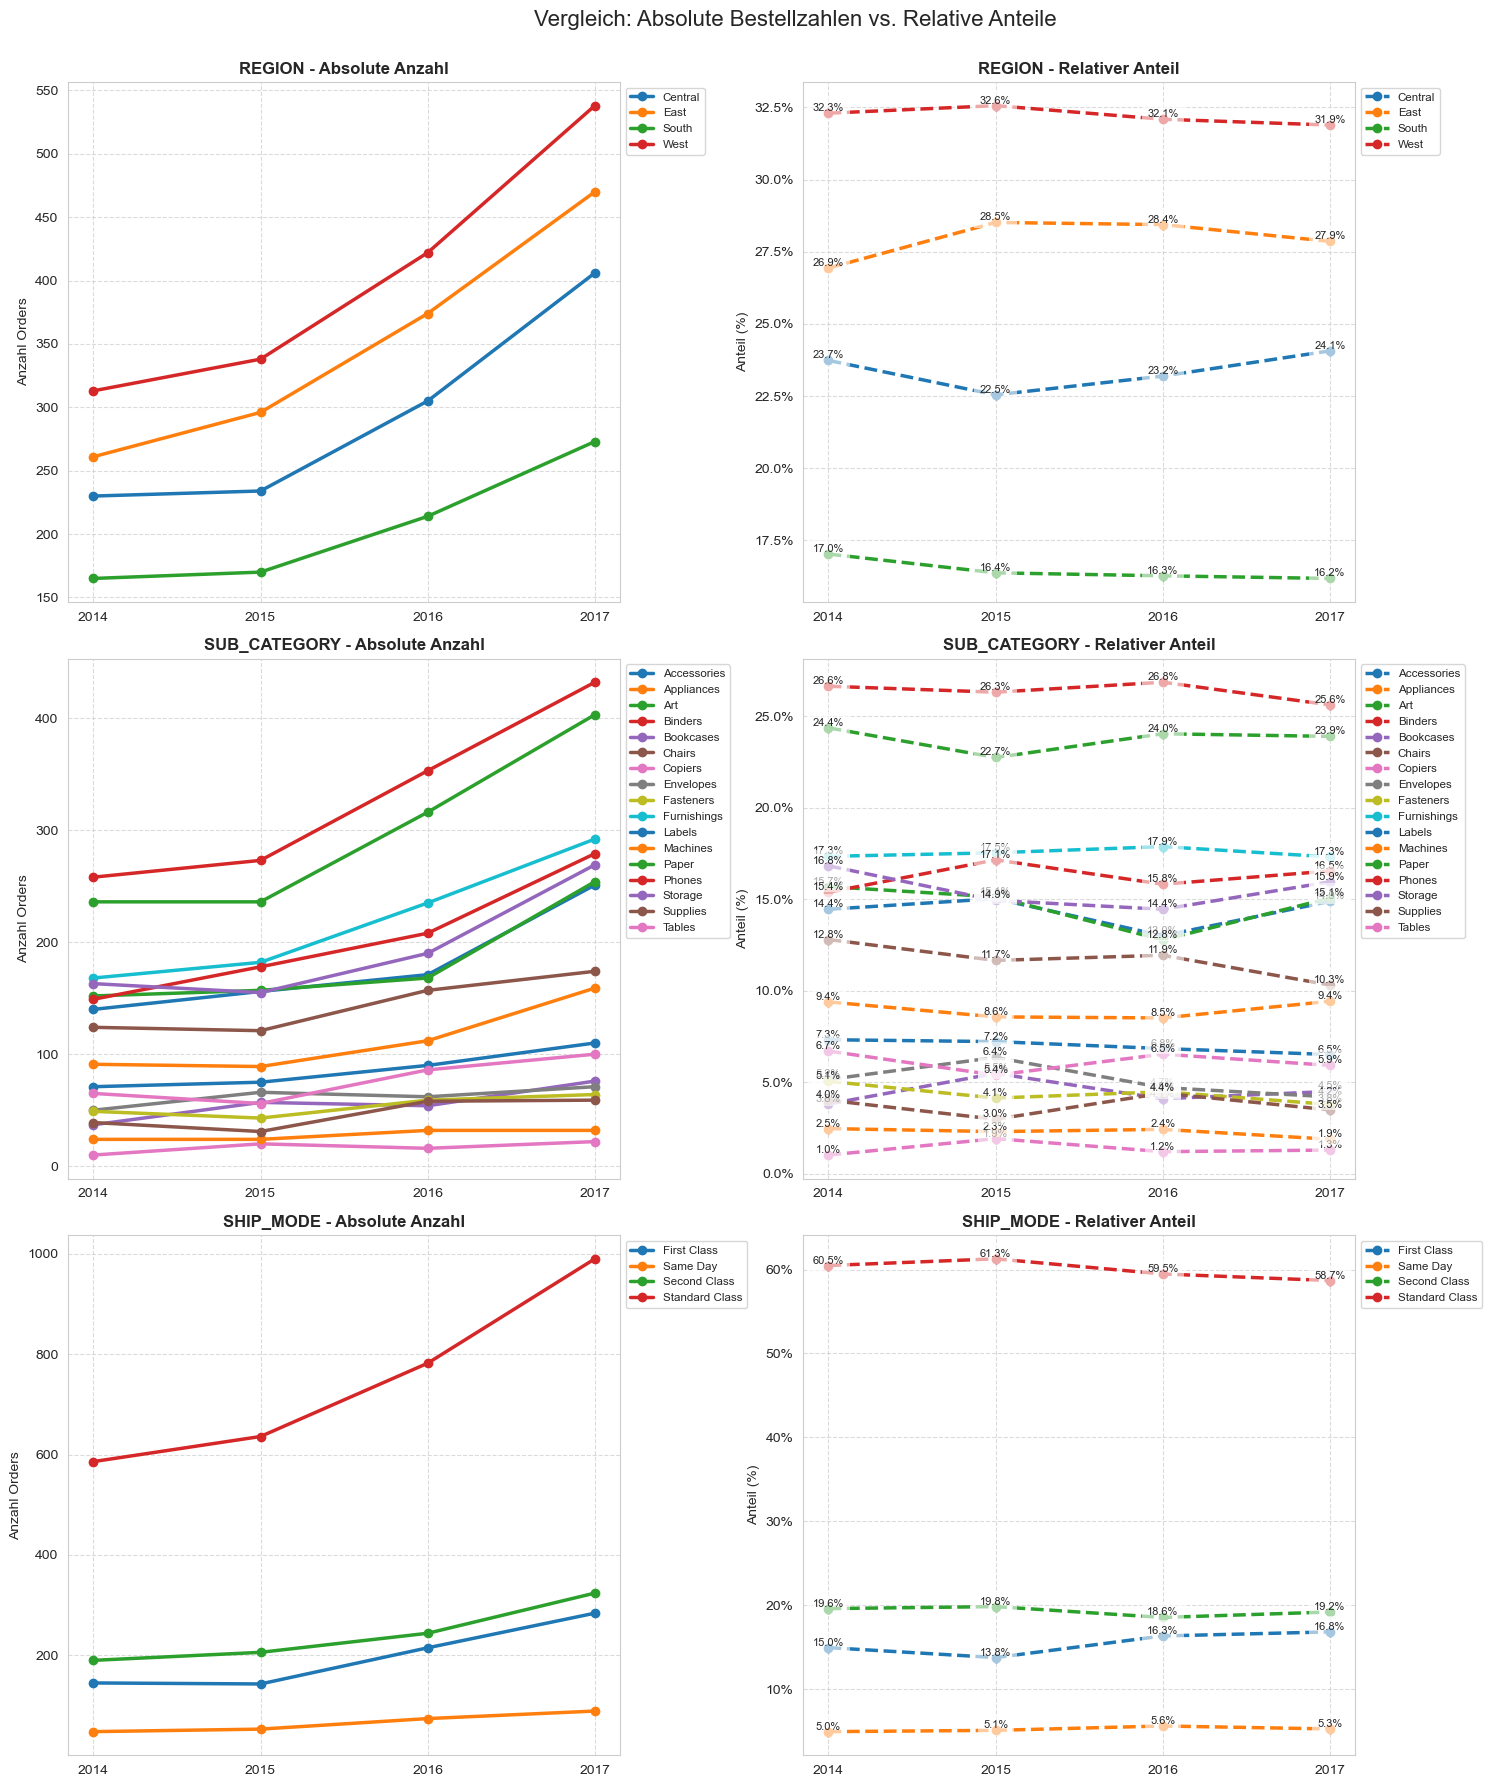

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# ---------------------------------------------------------
# 0. Die "dumme" Plotting-Funktion (wie oben definiert)
# ---------------------------------------------------------
def draw_styled_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    ax.plot(x_data, y_data, marker='o', linewidth=2.5, linestyle=linestyle, 
            label=label, color=color)
    
    if title: ax.set_title(title, fontweight='bold')
    if ylabel: ax.set_ylabel(ylabel)
    
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Legende nach außen (damit sie nicht im Bild stört)
    if label:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        # Labels nur plotten, wenn Daten vorhanden sind
        for x, y in zip(x_data, y_data):
            if pd.notnull(y):
                ax.text(x, y, f"{y:.1f}%", fontsize=8, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


# ---------------------------------------------------------
# 1. SETUP & BERECHNUNGEN (Kein Plotting hier!)
# ---------------------------------------------------------

# Globale Variablen
categories_to_plot = ['region', 'sub_category', 'ship_mode']
years = sorted(df['order_year'].unique())

# Grid vorbereiten
fig, axes = plt.subplots(nrows=len(categories_to_plot), ncols=2, 
                         figsize=(16, 6 * len(categories_to_plot)))
fig.suptitle('Vergleich: Absolute Bestellzahlen vs. Relative Anteile', fontsize=16, y=0.99)

# Jahressummen für die Prozentberechnung (Nenner)
yearly_totals = df.groupby('order_year')['order_id'].nunique()


# ---------------------------------------------------------
# 2. HAUPTSCHLEIFE (Daten aufbereiten & Plot-Funktion rufen)
# ---------------------------------------------------------

for i, cat in enumerate(categories_to_plot):
    
    # --- A) DATEN BERECHNEN ---
    # 1. Gruppieren nach Jahr und aktueller Kategorie (z.B. Region)
    grouped = df.groupby(['order_year', cat])['order_id'].nunique().reset_index()
    
    # 2. Merge mit Jahressummen
    grouped = grouped.merge(yearly_totals.rename('total_year'), on='order_year')
    
    # 3. Prozent berechnen
    grouped['percentage'] = (grouped['order_id'] / grouped['total_year']) * 100
    
    
    # --- B) ZEICHNEN (Aufruf der Funktion) ---
    
    # Wir brauchen die Achsen für diese Zeile
    ax_abs = axes[i, 0]
    ax_rel = axes[i, 1]
    
    # Welche Ausprägungen gibt es? (z.B. Central, North, South...)
    unique_vals = grouped[cat].unique()
    
    # Farbpalette holen, damit jede Linie eine eigene Farbe hat
    colors = sns.color_palette("tab10", len(unique_vals))
    
    # Jetzt müssen wir für JEDE Ausprägung (jede Linie) die Funktion einmal aufrufen
    for j, val in enumerate(unique_vals):
        
        # Daten filtern nur für diese eine Linie (z.B. nur 'North')
        subset = grouped[grouped[cat] == val]
        
        # Farbe für diesen Durchlauf
        curr_color = colors[j]
        
        # LINKER PLOT: Absolut
        draw_styled_plot(
            ax=ax_abs,
            x_data=subset['order_year'],
            y_data=subset['order_id'],
            label=str(val),               # Name in der Legende
            title=f'{cat.upper()} - Absolute Anzahl', 
            ylabel='Anzahl Orders',
            linestyle='-',                # Durchgezogen
            color=curr_color
        )
        
        # RECHTER PLOT: Relativ (%)
        draw_styled_plot(
            ax=ax_rel,
            x_data=subset['order_year'],
            y_data=subset['percentage'],
            label=str(val),
            title=f'{cat.upper()} - Relativer Anteil',
            ylabel='Anteil (%)',
            linestyle='--',               # Gestrichelt
            color=curr_color,             # Gleiche Farbe wie links
            is_percent=True               # Prozent-Formatierung an
        )
        
    # X-Achsen Ticks sauber setzen (für beide Plots in der Zeile)
    ax_abs.set_xticks(years)
    ax_rel.set_xticks(years)

# Layout finalisieren
plt.tight_layout()
plt.subplots_adjust(top=0.95, right=0.85) # Platz für Titel und externe Legenden schaffen
plt.show()

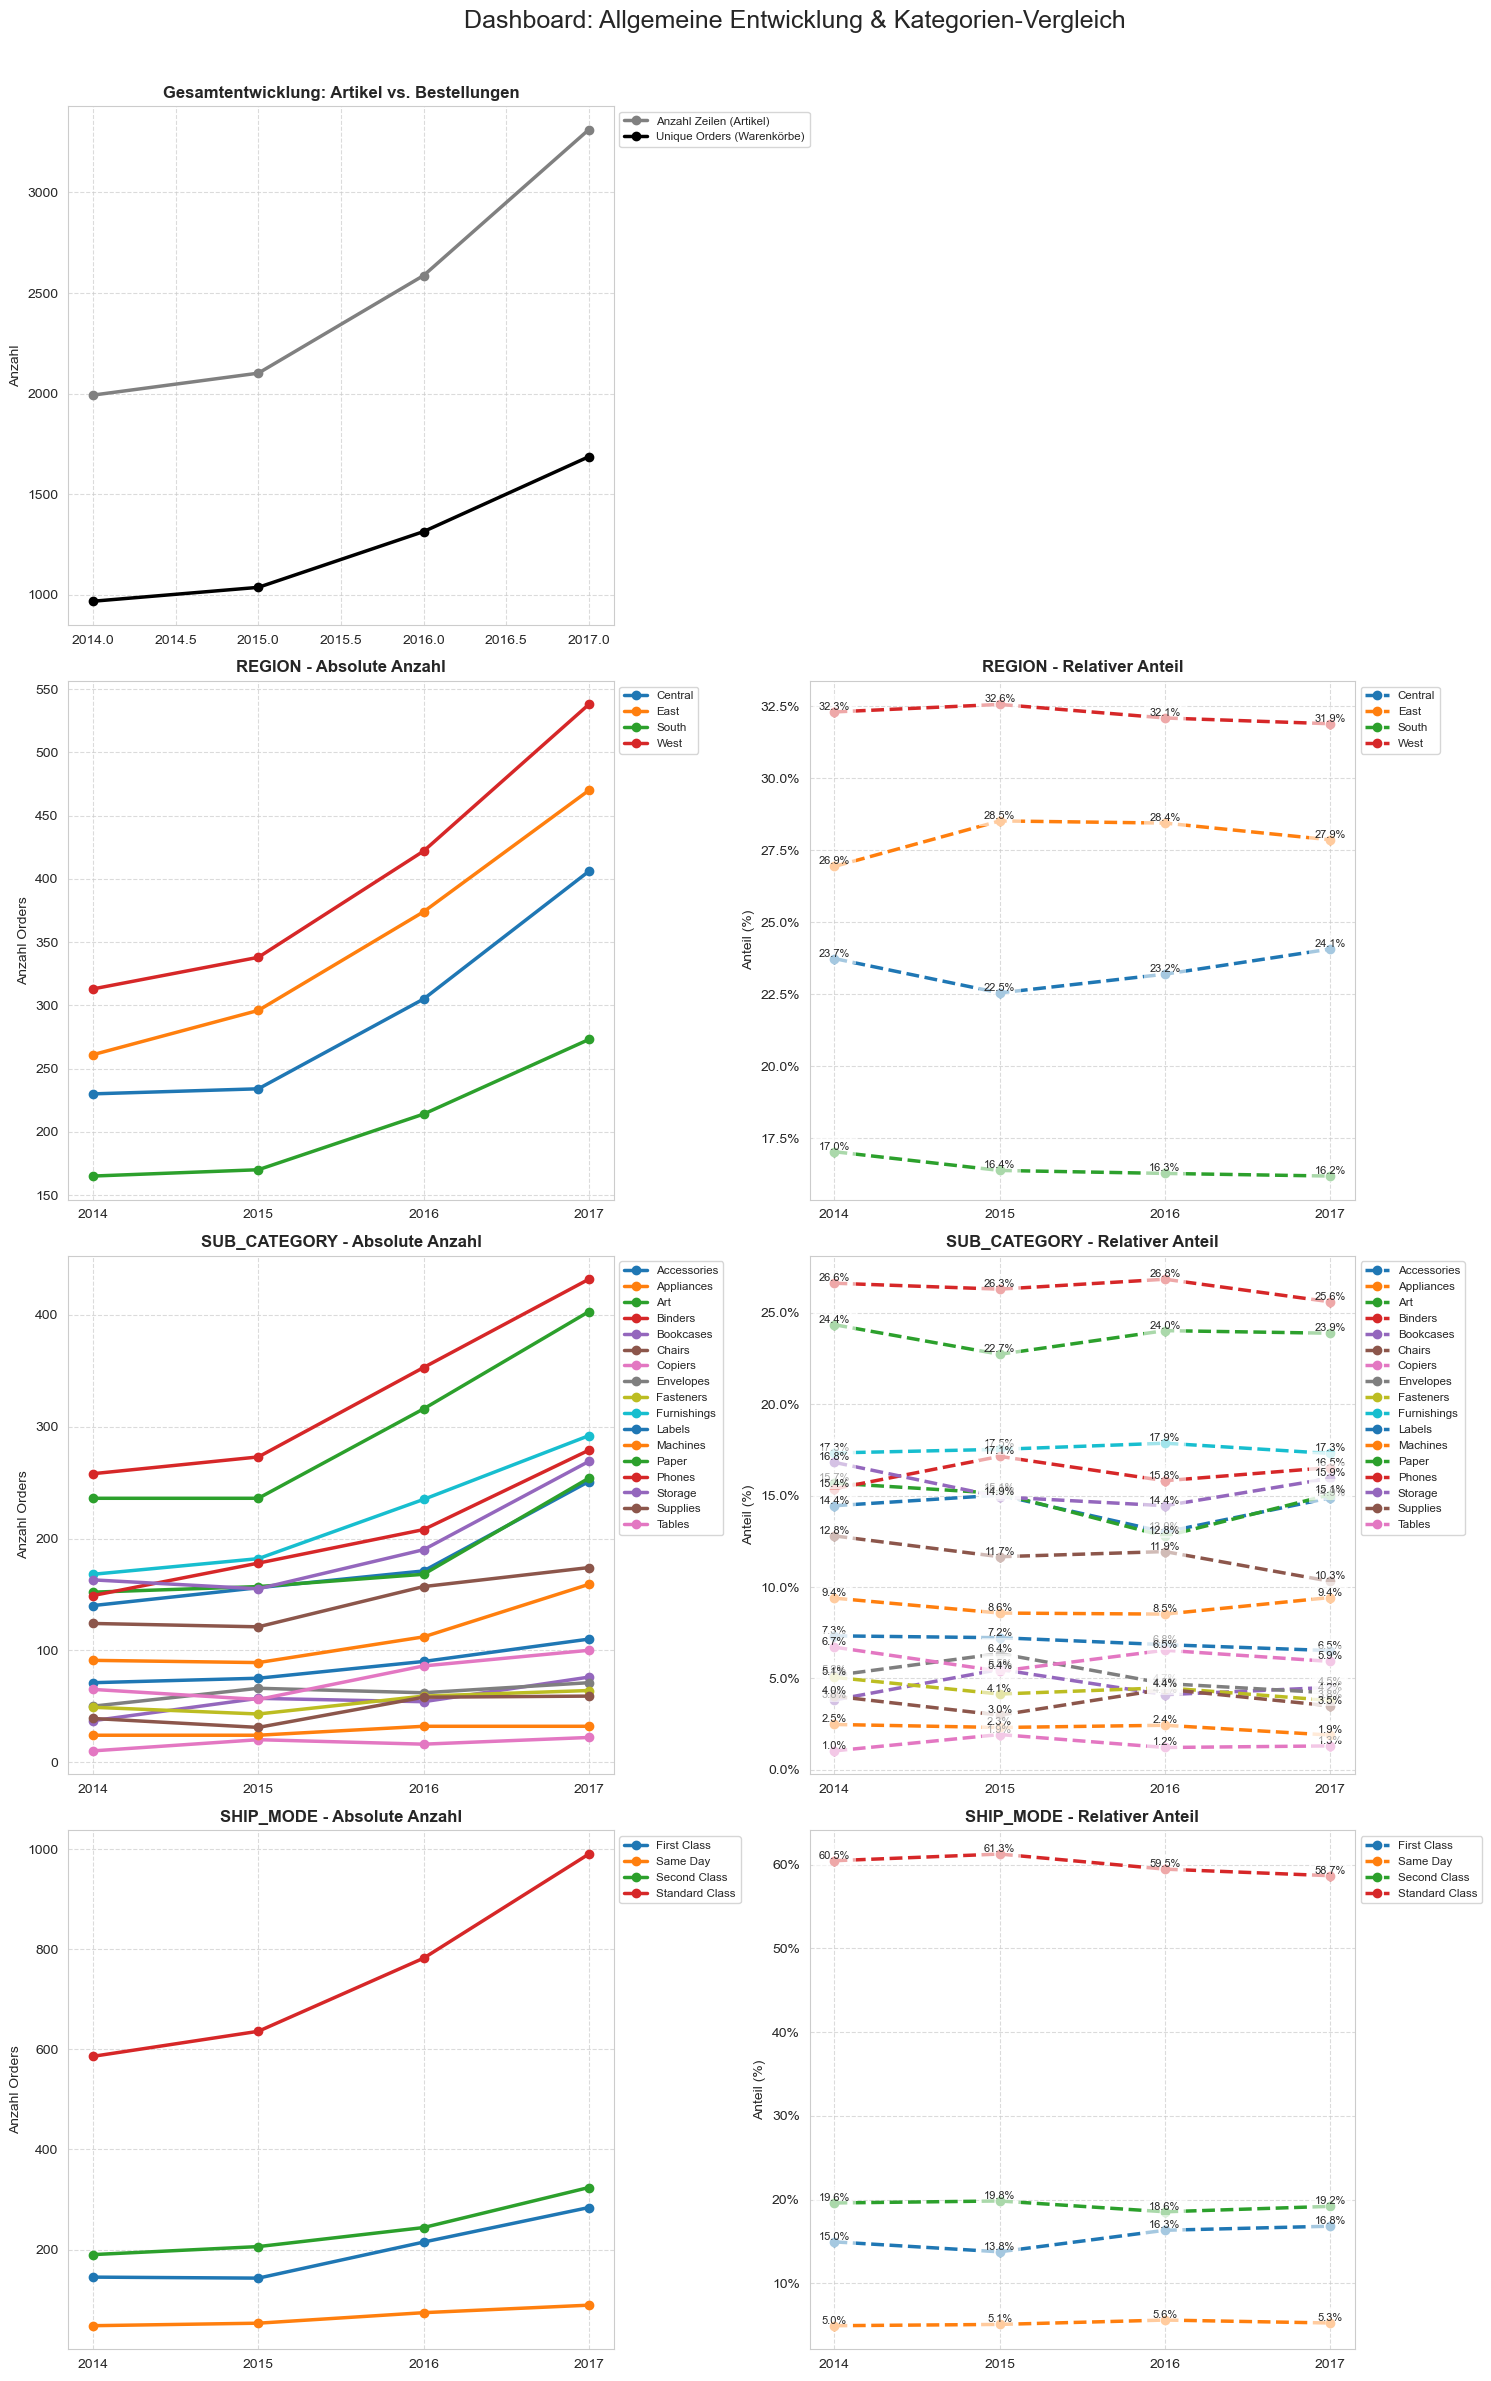

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# ---------------------------------------------------------
# 0. Die "dumme" Plotting-Funktion (unverändert)
# ---------------------------------------------------------
def draw_styled_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    # Plotten
    ax.plot(x_data, y_data, marker='o', linewidth=2.5, linestyle=linestyle, 
            label=label, color=color)
    
    # Styling
    if title: ax.set_title(title, fontweight='bold')
    if ylabel: ax.set_ylabel(ylabel)
    
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Legende
    if label:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

    # Prozent-Labels
    if is_percent:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        for x, y in zip(x_data, y_data):
            if pd.notnull(y):
                ax.text(x, y, f"{y:.1f}%", fontsize=8, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


# ---------------------------------------------------------
# 1. SETUP & GLOBALE BERECHNUNGEN
# ---------------------------------------------------------
categories_to_plot = ['region', 'sub_category', 'ship_mode']
years = sorted(df['order_year'].unique())
yearly_totals = df.groupby('order_year')['order_id'].nunique() # Für die %-Rechnung später

# --- NEU: Berechnung für den allgemeinen Überblick ---
general_stats = df.groupby('order_year').agg(
    total_rows=('order_id', 'count'),      # Wie viele Zeilen (Artikel) gibt es?
    unique_orders=('order_id', 'nunique')  # Wie viele echte Bestellungen?
).reset_index()


# ---------------------------------------------------------
# 2. GRID ERSTELLEN
# ---------------------------------------------------------
# Wir brauchen 1 Zeile mehr (+1) für den neuen allgemeinen Graphen
total_rows = len(categories_to_plot) + 1 

fig, axes = plt.subplots(nrows=total_rows, ncols=2, 
                         figsize=(16, 6 * total_rows))

fig.suptitle('Dashboard: Allgemeine Entwicklung & Kategorien-Vergleich', fontsize=18, y=0.99)


# ---------------------------------------------------------
# 3. DER NEUE ALLGEMEINE PLOT (Zeile 0)
# ---------------------------------------------------------
# Wir nutzen die Achse oben links (axes[0, 0])
ax_general = axes[0, 0]

# Linie 1: Alle Zeilen (Items)
draw_styled_plot(
    ax=ax_general,
    x_data=general_stats['order_year'],
    y_data=general_stats['total_rows'],
    label='Anzahl Zeilen (Artikel)',
    title='Gesamtentwicklung: Artikel vs. Bestellungen',
    ylabel='Anzahl',
    linestyle='-',
    color='grey'
)

# Linie 2: Unique Orders (Bestellungen)
draw_styled_plot(
    ax=ax_general,
    x_data=general_stats['order_year'],
    y_data=general_stats['unique_orders'],
    label='Unique Orders (Warenkörbe)',
    # Titel muss nicht nochmal gesetzt werden, ist der gleiche Plot
    linestyle='-',
    color='black' # Schwarz sticht gut hervor
)

# Den rechten Plot in der ersten Zeile schalten wir aus (damit es sauber aussieht),
# oder du könntest hier das Verhältnis (Artikel pro Order) plotten.
# Ich blende ihn hier aus ("off"), damit der Fokus auf dem Hauptgraph liegt.
axes[0, 1].axis('off')


# ---------------------------------------------------------
# 4. LOOP ÜBER DIE KATEGORIEN (Zeilen 1 bis N)
# ---------------------------------------------------------
for i, cat in enumerate(categories_to_plot):
    
    # WICHTIG: Wir müssen i+1 nehmen, da Zeile 0 schon belegt ist
    current_row = i + 1
    
    # --- Daten aggregieren (wie gehabt) ---
    grouped = df.groupby(['order_year', cat])['order_id'].nunique().reset_index()
    grouped = grouped.merge(yearly_totals.rename('total_year'), on='order_year')
    grouped['percentage'] = (grouped['order_id'] / grouped['total_year']) * 100
    
    # --- Plotting ---
    ax_abs = axes[current_row, 0]
    ax_rel = axes[current_row, 1]
    
    unique_vals = grouped[cat].unique()
    colors = sns.color_palette("tab10", len(unique_vals))
    
    for j, val in enumerate(unique_vals):
        subset = grouped[grouped[cat] == val]
        curr_color = colors[j]
        
        # Linker Plot (Absolut)
        draw_styled_plot(
            ax=ax_abs,
            x_data=subset['order_year'],
            y_data=subset['order_id'],
            label=str(val),
            title=f'{cat.upper()} - Absolute Anzahl', 
            ylabel='Anzahl Orders',
            linestyle='-',
            color=curr_color
        )
        
        # Rechter Plot (Relativ)
        draw_styled_plot(
            ax=ax_rel,
            x_data=subset['order_year'],
            y_data=subset['percentage'],
            label=str(val),
            title=f'{cat.upper()} - Relativer Anteil',
            ylabel='Anteil (%)',
            linestyle='--',
            color=curr_color,
            is_percent=True
        )
        
    # Ticks setzen
    ax_abs.set_xticks(years)
    ax_rel.set_xticks(years)

# Layout finalisieren
plt.tight_layout()
plt.subplots_adjust(top=0.95, right=0.85)
plt.show()

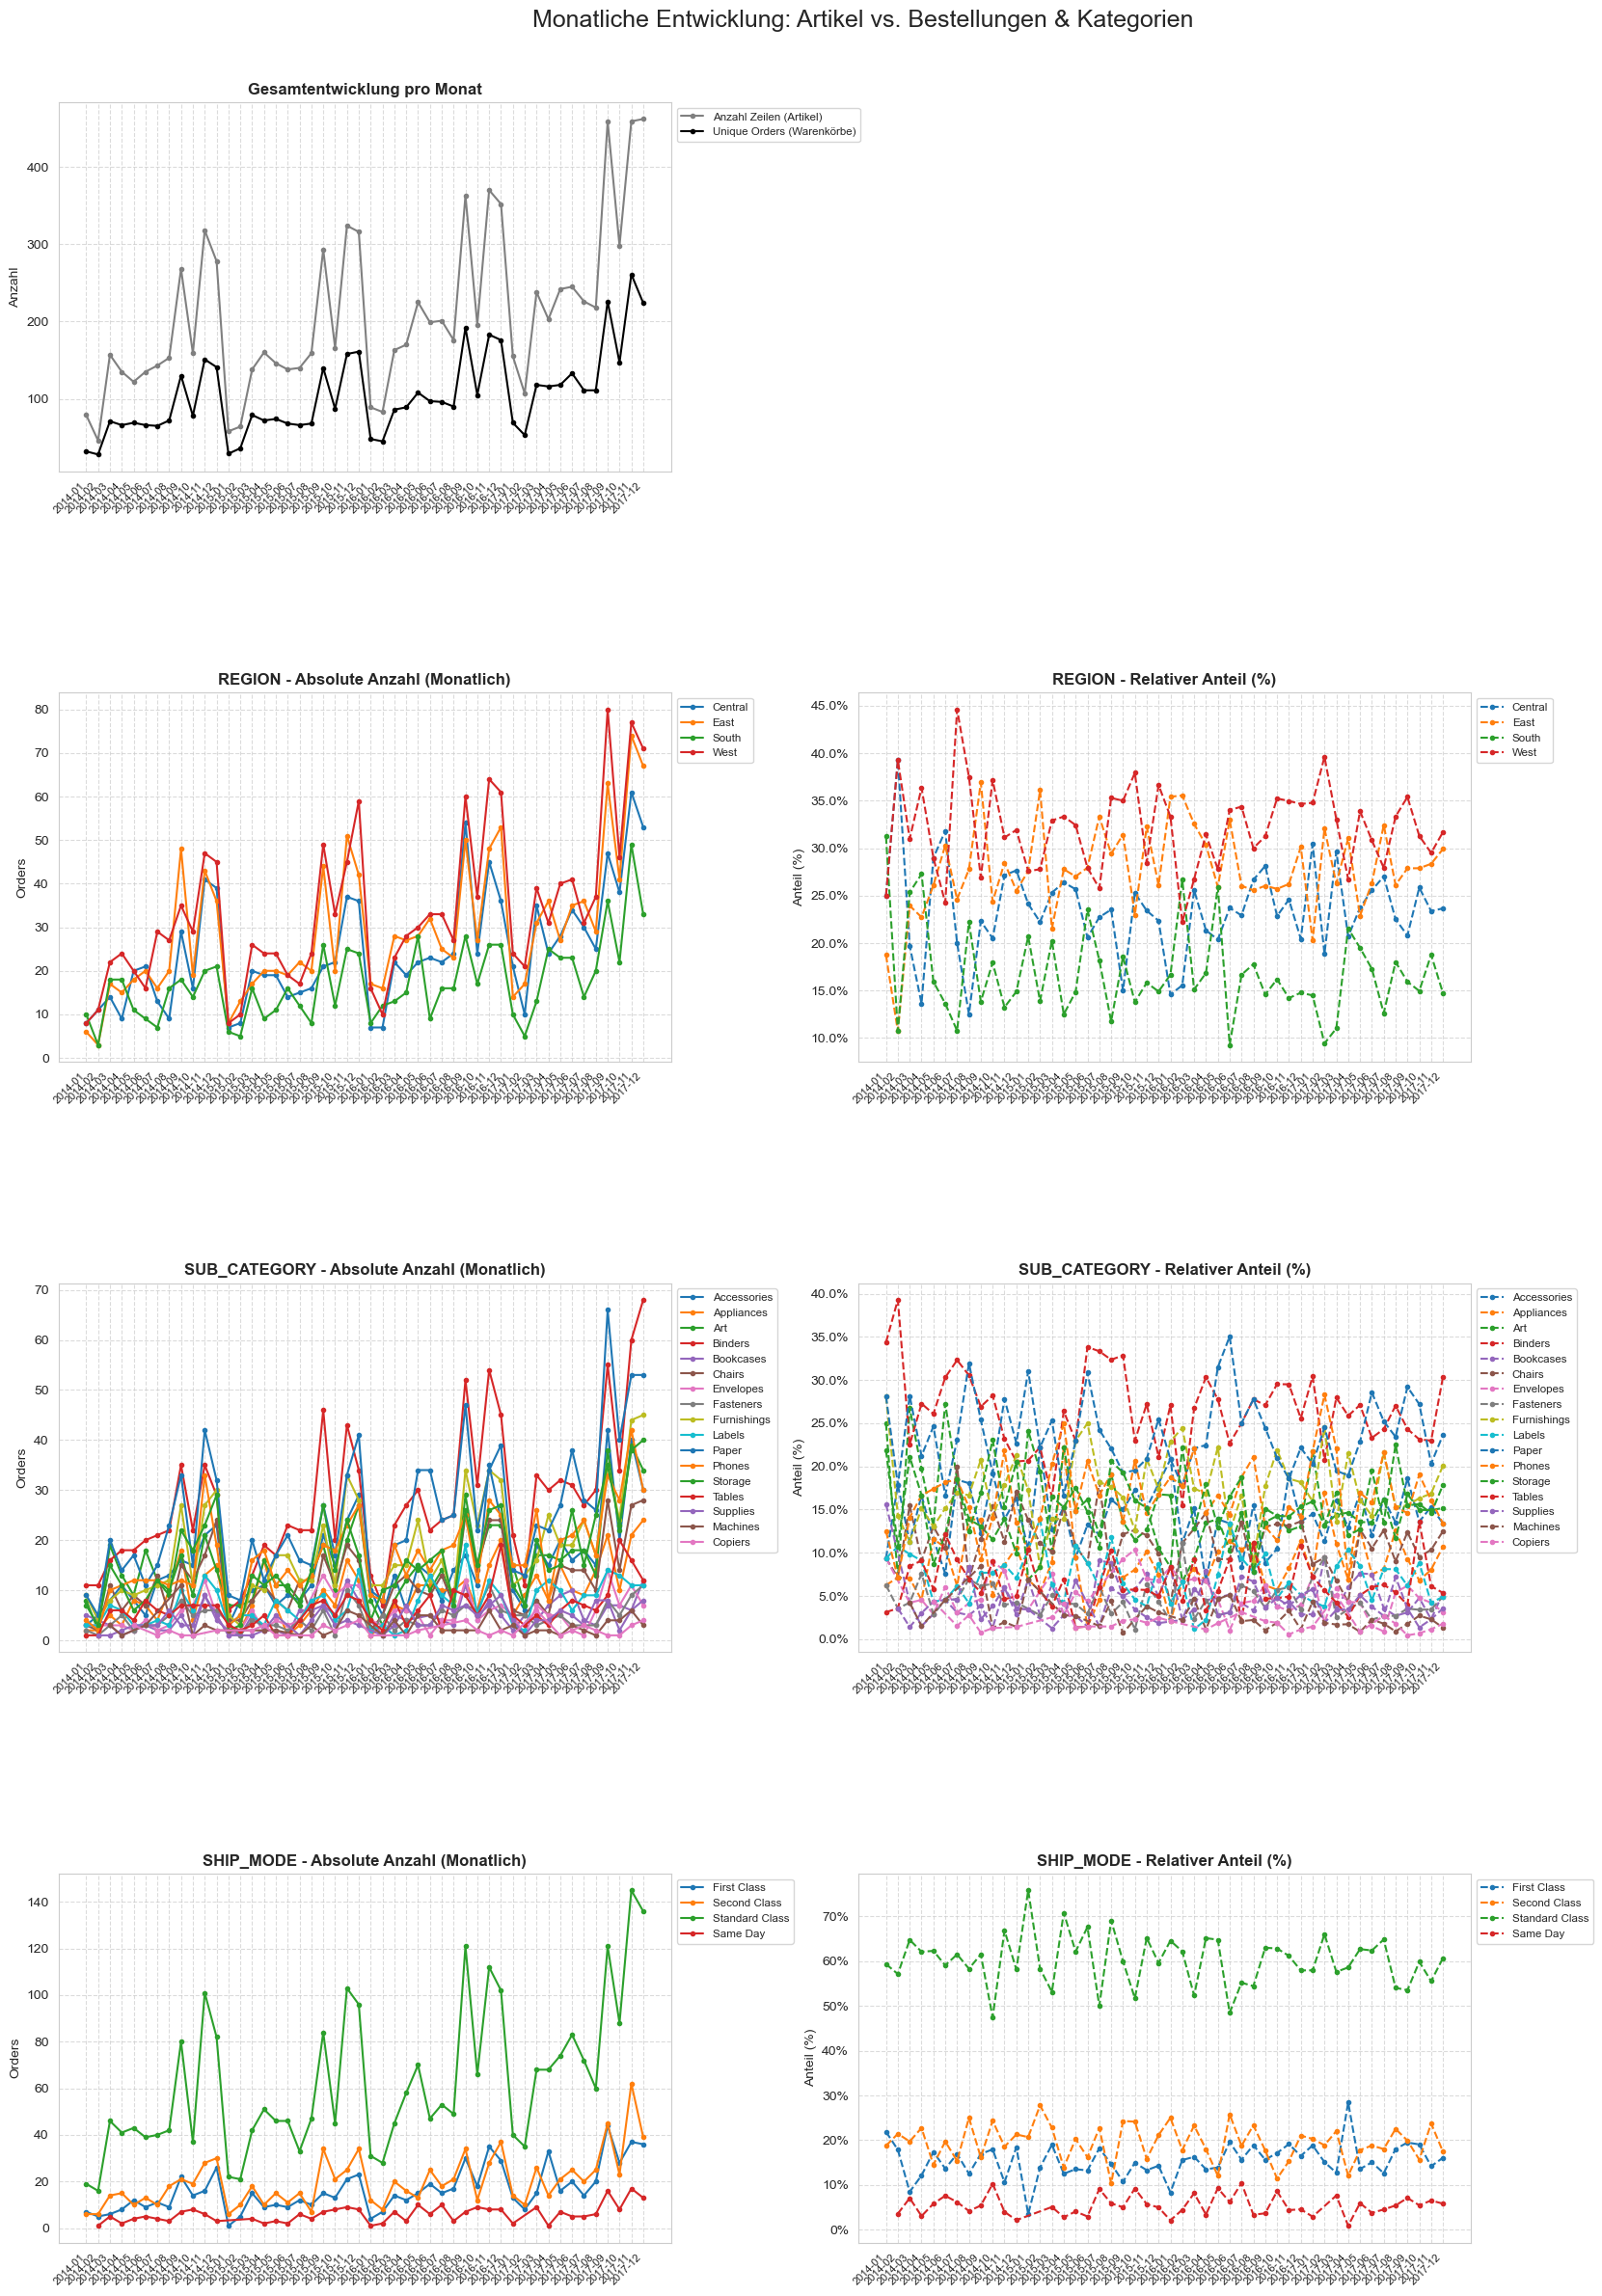

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# ---------------------------------------------------------
# 0. Die "dumme" Plotting-Funktion
# ---------------------------------------------------------
def draw_styled_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    ax.plot(x_data, y_data, marker='.', linewidth=1.5, linestyle=linestyle, 
            label=label, color=color) # Marker kleiner gemacht ('.') für viele Monate
    
    if title: ax.set_title(title, fontweight='bold')
    if ylabel: ax.set_ylabel(ylabel)
    
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if label:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        # Bei Monaten lassen wir die Text-Labels an den Punkten weg, 
        # sonst wird das Diagramm unlesbar schwarz vor lauter Text.

# ---------------------------------------------------------
# 1. DATEN VORBEREITEN (MONATS-LOGIK)
# ---------------------------------------------------------

# SCHRITT A: Wir erstellen eine saubere YYYY-MM Spalte für die Sortierung
# (Ich gehe davon aus, dass du eine 'order_date' Spalte hast)
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M').astype(str) # Gibt '2019-01', '2019-02' etc.

# Globale Variablen für den Plot
categories_to_plot = ['region', 'sub_category', 'ship_mode']
months = sorted(df['order_month'].unique()) # Alle Monate chronologisch sortiert

# SCHRITT B: Berechnung der Nenner für Prozentrechnung (Pro Monat!)
monthly_totals = df.groupby('order_month')['order_id'].nunique()

# SCHRITT C: Allgemeine Statistik (Zeilen vs. Unique Orders) pro Monat
general_stats = df.groupby('order_month').agg(
    total_rows=('order_id', 'count'),      
    unique_orders=('order_id', 'nunique')  
).reset_index()


# ---------------------------------------------------------
# 2. GRID ERSTELLEN
# ---------------------------------------------------------
total_rows = len(categories_to_plot) + 1 
fig, axes = plt.subplots(nrows=total_rows, ncols=2, 
                         figsize=(18, 6 * total_rows)) # Breiter, da Zeitachse länger ist

fig.suptitle('Monatliche Entwicklung: Artikel vs. Bestellungen & Kategorien', fontsize=18, y=0.99)


# ---------------------------------------------------------
# 3. DER ALLGEMEINE PLOT (Zeile 0)
# ---------------------------------------------------------
ax_general = axes[0, 0]

draw_styled_plot(
    ax=ax_general,
    x_data=general_stats['order_month'],
    y_data=general_stats['total_rows'],
    label='Anzahl Zeilen (Artikel)',
    title='Gesamtentwicklung pro Monat',
    ylabel='Anzahl',
    linestyle='-',
    color='grey'
)

draw_styled_plot(
    ax=ax_general,
    x_data=general_stats['order_month'],
    y_data=general_stats['unique_orders'],
    label='Unique Orders (Warenkörbe)',
    linestyle='-',
    color='black'
)

# Rechten Plot in Zeile 0 ausblenden
axes[0, 1].axis('off')

# Rotation für den ersten Plot
plt.setp(ax_general.get_xticklabels(), rotation=45, ha='right', fontsize=8)


# ---------------------------------------------------------
# 4. LOOP ÜBER KATEGORIEN (Zeile 1 bis N)
# ---------------------------------------------------------
for i, cat in enumerate(categories_to_plot):
    
    current_row = i + 1
    
    # --- Daten aggregieren (jetzt nach order_month) ---
    grouped = df.groupby(['order_month', cat])['order_id'].nunique().reset_index()
    grouped = grouped.merge(monthly_totals.rename('total_month'), on='order_month')
    grouped['percentage'] = (grouped['order_id'] / grouped['total_month']) * 100
    
    # --- Plotting ---
    ax_abs = axes[current_row, 0]
    ax_rel = axes[current_row, 1]
    
    unique_vals = grouped[cat].unique()
    colors = sns.color_palette("tab10", len(unique_vals))
    
    for j, val in enumerate(unique_vals):
        subset = grouped[grouped[cat] == val]
        curr_color = colors[j]
        
        # Linker Plot (Absolut)
        draw_styled_plot(
            ax=ax_abs,
            x_data=subset['order_month'],
            y_data=subset['order_id'],
            label=str(val),
            title=f'{cat.upper()} - Absolute Anzahl (Monatlich)', 
            ylabel='Orders',
            linestyle='-',
            color=curr_color
        )
        
        # Rechter Plot (Relativ)
        draw_styled_plot(
            ax=ax_rel,
            x_data=subset['order_month'],
            y_data=subset['percentage'],
            label=str(val),
            title=f'{cat.upper()} - Relativer Anteil (%)',
            ylabel='Anteil (%)',
            linestyle='--',
            color=curr_color,
            is_percent=True
        )
        
    # --- WICHTIG: X-Achse formatieren ---
    # Da Monate sehr breit sind, rotieren wir die Schrift bei allen Graphen
    for ax in [ax_abs, ax_rel]:
        # Wir setzen explizit die Ticks (alle Monate), damit Matplotlib keine auslässt
        ax.set_xticks(range(len(months))) 
        ax.set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        # Reduziere die Dichte der Ticks, falls es zu viele Monate sind (optional):
        # ax.xaxis.set_major_locator(plt.MaxNLocator(20)) 

# Layout finalisieren
plt.tight_layout()
plt.subplots_adjust(top=0.95, right=0.85, hspace=0.6) # hspace erhöht, damit X-Labels Platz haben
plt.show()

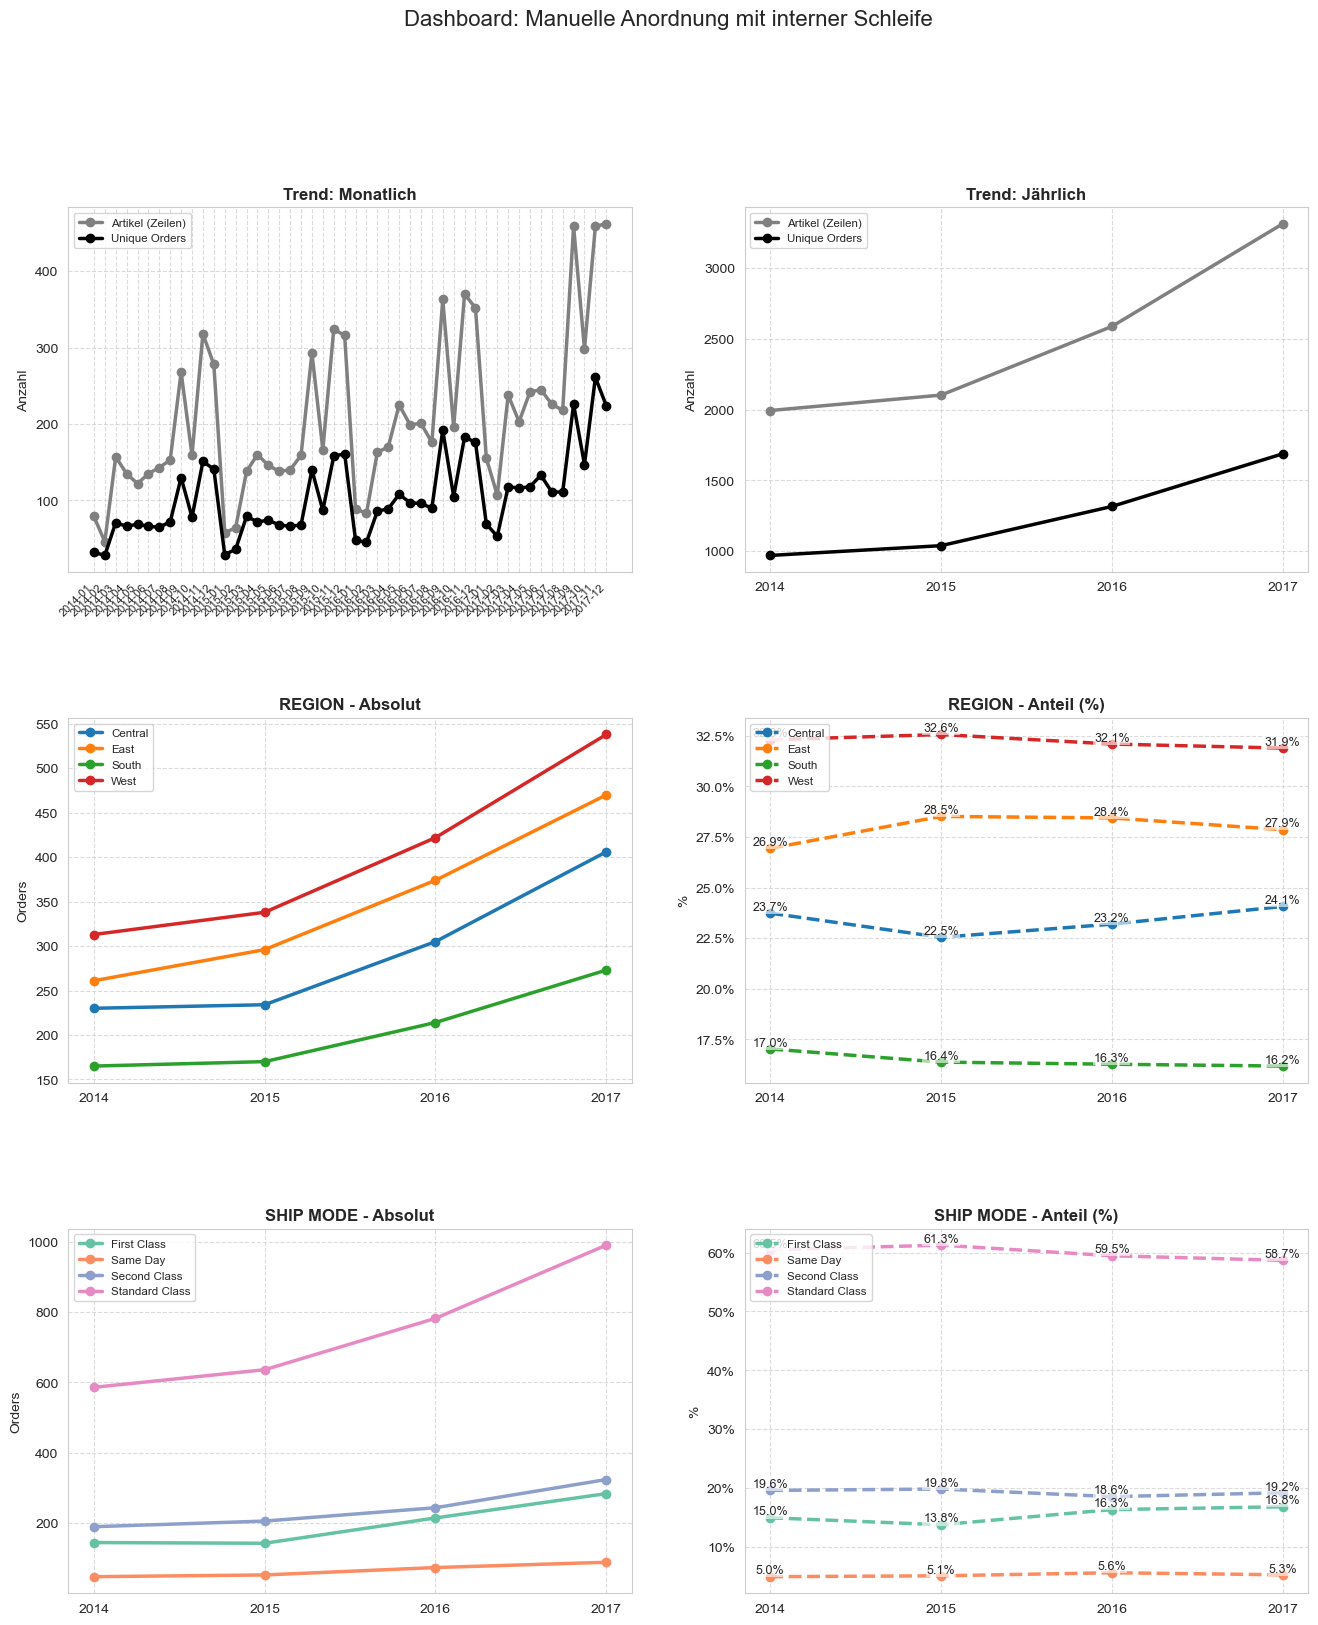

In [ ]:


# ---------------------------------------------------------
# 2. DATEN VORBEREITUNG (Global)
# ---------------------------------------------------------

# Datum formatieren
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# Listen für die X-Achsen
years = sorted(df['order_year'].unique())
months = sorted(df['order_month'].unique())

# Daten für Zeile 1 (Allgemeiner Überblick)
stats_monthly = df.groupby('order_month').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()
stats_yearly = df.groupby('order_year').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()

# Gesamtsummen pro Jahr für die Prozentrechnung der Kategorien
yearly_totals = df.groupby('order_year')['order_id'].nunique()


# ---------------------------------------------------------
# 3. PLOTTING SETUP
# ---------------------------------------------------------
# Wir definieren explizit 3 Zeilen:
# Zeile 0: Allgemein (Monatlich & Jährlich)
# Zeile 1: Region (Absolut & Relativ)
# Zeile 2: Ship Mode (Absolut & Relativ)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.2) # Abstände anpassen

fig.suptitle('Dashboard: Manuelle Anordnung mit interner Schleife', fontsize=16, y=0.99)


# =============================================================================
# BLOCK 1: ALLGEMEINE ENTWICKLUNG (Zeile 0)
# =============================================================================

# --- Oben Links: Monatliche Entwicklung (Detail) ---
ax_month = axes[0, 0]

# Hier brauchen wir keine Schleife, es sind nur 2 spezifische Linien
draw_styled_plot(ax=ax_month, x_data=stats_monthly['order_month'], y_data=stats_monthly['rows'],
                 label='Artikel (Zeilen)', title='Trend: Monatlich', ylabel='Anzahl', color='grey')

draw_styled_plot(ax=ax_month, x_data=stats_monthly['order_month'], y_data=stats_monthly['orders'],
                 label='Unique Orders', color='black')

# X-Achse formatieren (Monate rotieren)
ax_month.set_xticks(range(len(months)))
ax_month.set_xticklabels(months, rotation=45, ha='right', fontsize=8)


# --- Oben Rechts: Jährliche Entwicklung (Überblick) ---
ax_year = axes[0, 1]

draw_styled_plot(ax=ax_year, x_data=stats_yearly['order_year'], y_data=stats_yearly['rows'],
                 label='Artikel (Zeilen)', title='Trend: Jährlich', ylabel='Anzahl', color='grey')

draw_styled_plot(ax=ax_year, x_data=stats_yearly['order_year'], y_data=stats_yearly['orders'],
                 label='Unique Orders', color='black')

ax_year.set_xticks(years)


# =============================================================================
# BLOCK 2: REGION (Zeile 1)
# =============================================================================

# 1. Daten berechnen für Region
df_reg = df.groupby(['order_year', 'region'])['order_id'].nunique().reset_index()
df_reg = df_reg.merge(yearly_totals.rename('total'), on='order_year')
df_reg['pct'] = (df_reg['order_id'] / df_reg['total']) * 100

# 2. Setup für Region-Plots
ax_reg_abs = axes[1, 0]
ax_reg_rel = axes[1, 1]
unique_regions = df_reg['region'].unique()
colors_reg = sns.color_palette("tab10", len(unique_regions)) # Farben generieren

# 3. Interne Schleife (Nur für Region!)
for i, region in enumerate(unique_regions):
    subset = df_reg[df_reg['region'] == region]
    c = colors_reg[i]
    
    # Links: Absolut
    draw_styled_plot(ax=ax_reg_abs, x_data=subset['order_year'], y_data=subset['order_id'],
                     label=region, title='REGION - Absolut', ylabel='Orders', color=c)
    
    # Rechts: Relativ
    draw_styled_plot(ax=ax_reg_rel, x_data=subset['order_year'], y_data=subset['pct'],
                     label=region, title='REGION - Anteil (%)', ylabel='%', 
                     linestyle='--', color=c, is_percent=True)

# Achsen setzen
ax_reg_abs.set_xticks(years)
ax_reg_rel.set_xticks(years)


# =============================================================================
# BLOCK 3: SHIP MODE (Zeile 2)
# =============================================================================

# 1. Daten berechnen für Ship Mode
df_ship = df.groupby(['order_year', 'ship_mode'])['order_id'].nunique().reset_index()
df_ship = df_ship.merge(yearly_totals.rename('total'), on='order_year')
df_ship['pct'] = (df_ship['order_id'] / df_ship['total']) * 100

# 2. Setup für Ship-Plots
ax_ship_abs = axes[2, 0]
ax_ship_rel = axes[2, 1]
unique_modes = df_ship['ship_mode'].unique()
colors_ship = sns.color_palette("Set2", len(unique_modes)) # Andere Farbpalette zur Unterscheidung

# 3. Interne Schleife (Nur für Ship Mode!)
for i, mode in enumerate(unique_modes):
    subset = df_ship[df_ship['ship_mode'] == mode]
    c = colors_ship[i]
    
    # Links: Absolut
    draw_styled_plot(ax=ax_ship_abs, x_data=subset['order_year'], y_data=subset['order_id'],
                     label=mode, title='SHIP MODE - Absolut', ylabel='Orders', color=c)
    
    # Rechts: Relativ
    draw_styled_plot(ax=ax_ship_rel, x_data=subset['order_year'], y_data=subset['pct'],
                     label=mode, title='SHIP MODE - Anteil (%)', ylabel='%', 
                     linestyle='--', color=c, is_percent=True)

# Achsen setzen
ax_ship_abs.set_xticks(years)
ax_ship_rel.set_xticks(years)


# ---------------------------------------------------------
# FINALISIERUNG
# ---------------------------------------------------------
plt.show()

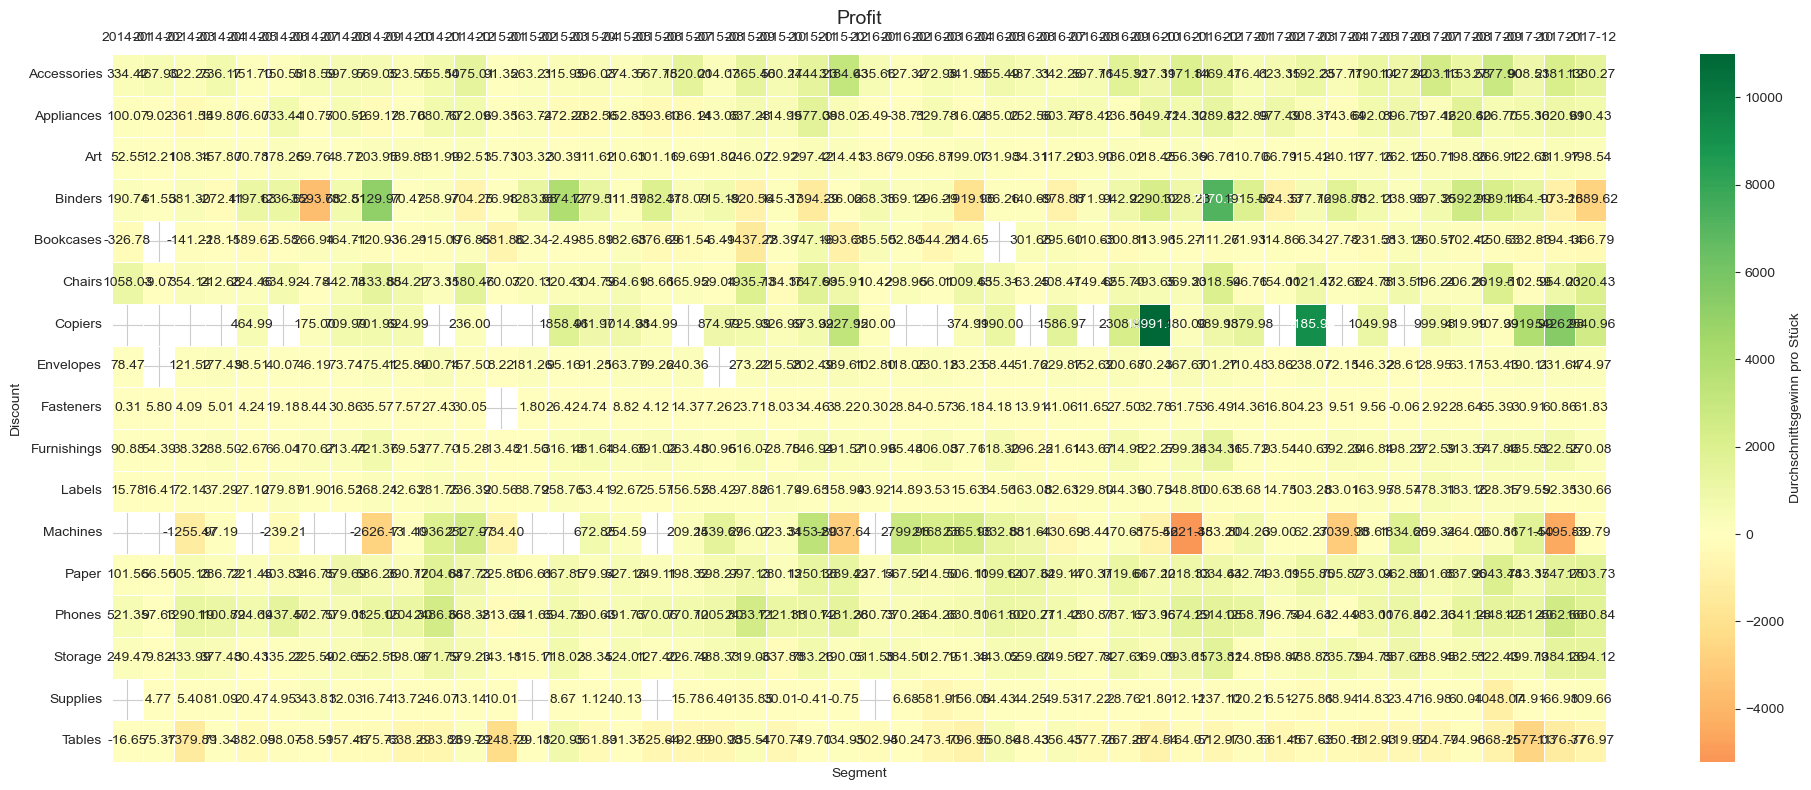

In [44]:
gen_plot(df_profit_sum_sub_category_month, None, "Profit", "Segment", "Discount", (20, 8))

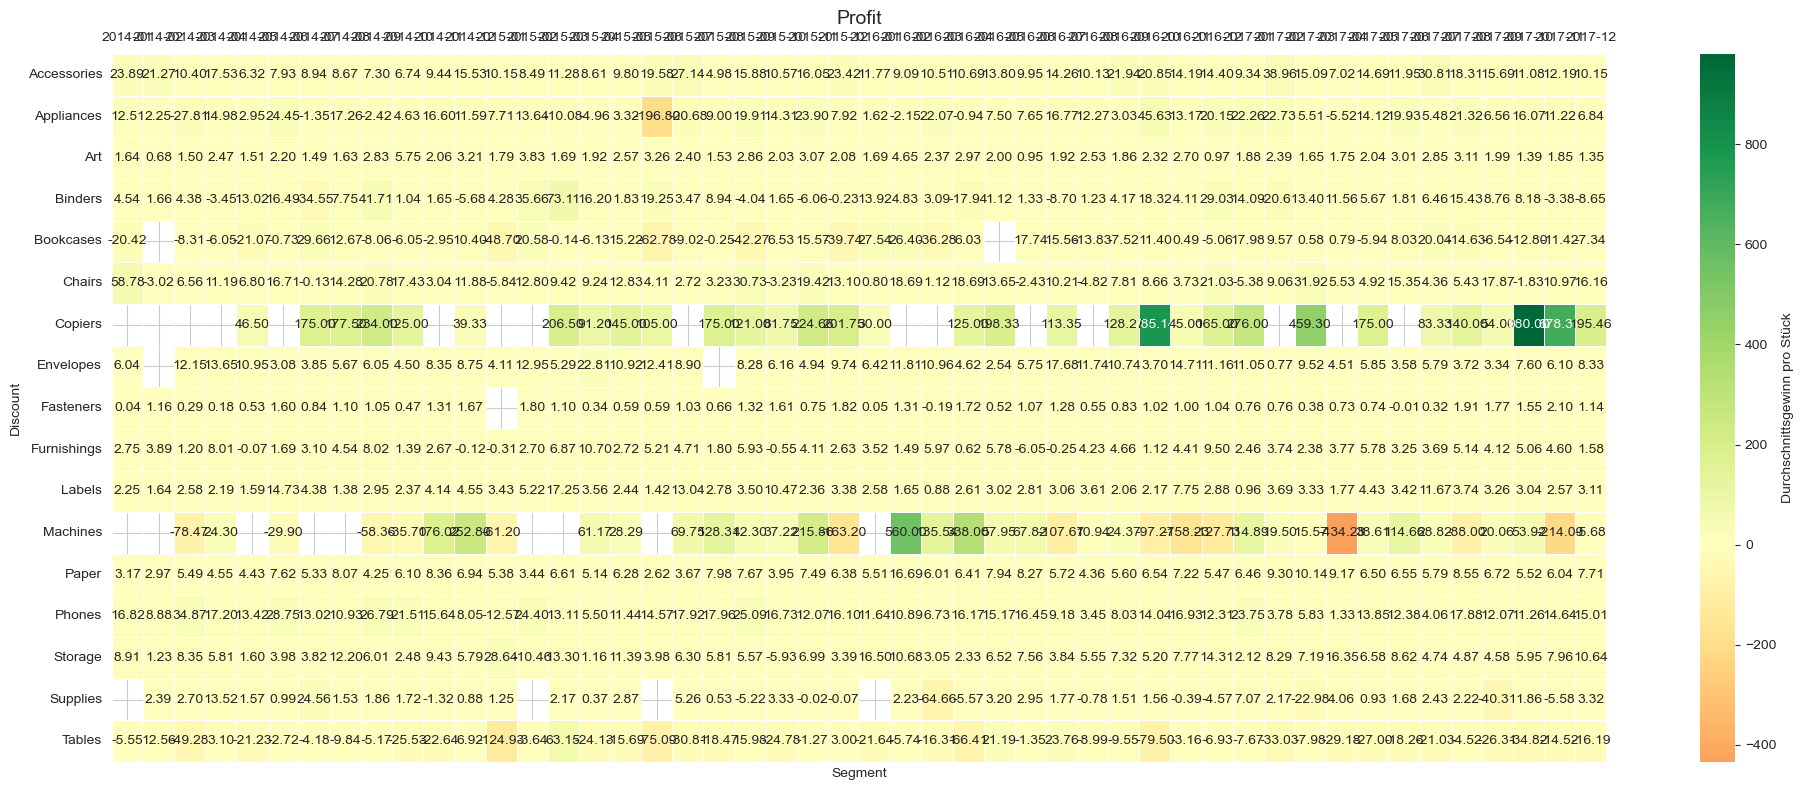

In [45]:
gen_plot(df_profit_sum_sub_category_month, df_quantity_sum_sub_category_month, "Profit", "Segment", "Discount", (20, 8))

## Ab hier noch nicht bearbeitet

In [29]:
df_test = df[df['order_id']=='CA-2014-115812']
df_test = df_test.drop(columns=[ 'customer_name', 'country', 'state', 'postal_code', 'order_year', 'order_month', 'order_day', 'ship_year', 'ship_month', 'ship_mode', 'city' ,'ship_day', 'segment', 'region', 'order_weekday', 'order_week_of_year', 'order_is_weekend', 'order_date', 'ship_date', 'time_to_deliver'])
df_test.head(10)

row_id        order_id customer_id       product_id         category  \
5        6  CA-2014-115812    BH-11710  FUR-FU-10001487        Furniture   
6        7  CA-2014-115812    BH-11710  OFF-AR-10002833  Office Supplies   
7        8  CA-2014-115812    BH-11710  TEC-PH-10002275       Technology   
8        9  CA-2014-115812    BH-11710  OFF-BI-10003910  Office Supplies   
9       10  CA-2014-115812    BH-11710  OFF-AP-10002892  Office Supplies   
10      11  CA-2014-115812    BH-11710  FUR-TA-10001539        Furniture   
11      12  CA-2014-115812    BH-11710  TEC-PH-10002033       Technology   

   sub_category                                       product_name     sales  \
5   Furnishings  Eldon Expressions Wood and Plastic Desk Access...    48.860   
6           Art                                         Newell 322     7.280   
7        Phones                     Mitel 5320 IP Phone VoIP phone   907.152   
8       Binders  DXL Angle-View Binders with Locking Rings by S...    18.504   
9    Appliances                   Belkin F5C206VTEL 6 Outlet Surge   114.900   
10       Tables           Chromcraft Rectangular Conference Tables  1706.184   
11       Phones      Konftel 250 Conference phone - Charcoal black   911.424   

    quantity  discount   profit  
5          7       0.0  14.1694  
6          4       0.0   1.9656  
7          6       0.2  90.7152  
8          3       0.2   5.7825  
9          5       0.0  34.4700  
10         9       0.2  85.3092  
11         4       0.2  68.3568

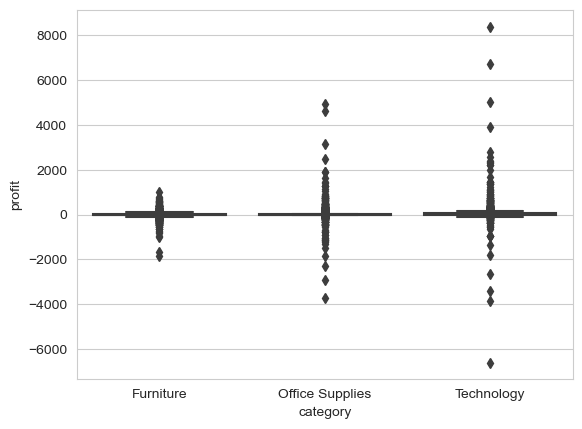

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Menge pro Kategorie
sns.boxplot(x='category', y='profit', data=df)
plt.show()


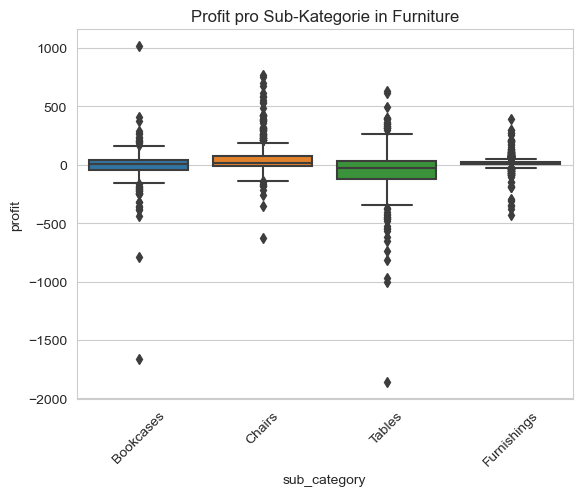

In [31]:
sns.boxplot(x='sub_category', y='profit', data=df[df['category']=='Furniture'])
plt.title("Profit pro Sub-Kategorie in Furniture")
plt.xticks(rotation=45)  # Labels lesbar machen
plt.show()